In [1]:
#
# Verify Reading Dataset via MnistDataloader class
#
from perceptron_2 import Perceptron
import random
import matplotlib.pyplot as plt
import numpy as np # linear algeЦbra
import struct
from array import array
from os.path  import join
from MnistReader import MnistDataloader

#
# Set file paths based on added MNIST Datasets
#
input_path = 'data'
training_images_filepath = join(input_path, 'train-images-idx3-ubyte/train-images-idx3-ubyte')
training_labels_filepath = join(input_path, 'train-labels-idx1-ubyte/train-labels-idx1-ubyte')
test_images_filepath = join(input_path, 't10k-images-idx3-ubyte/t10k-images-idx3-ubyte')
test_labels_filepath = join(input_path, 't10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte')

#
# Helper function to show a list of images with their relating titles
#
def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(30,20))
    index = 1    
    for x in zip(images, title_texts):        
        image = x[0]        
        title_text = x[1]
        plt.subplot(rows, cols, index)        
        plt.imshow(image, cmap=plt.cm.gray)
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);        
        index += 1

#
# Load MINST dataset
#
mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()

#
# Show some random training and test images 
#
images_2_show = []
titles_2_show = []
for i in range(0, 10):
    r = random.randint(1, 60000)
    images_2_show.append(x_train[r])
    titles_2_show.append('training image [' + str(r) + '] = ' + str(y_train[r]))    

for i in range(0, 5):
    r = random.randint(1, 10000)
    images_2_show.append(x_test[r])        
    titles_2_show.append('test image [' + str(r) + '] = ' + str(y_test[r]))    

#show_images(images_2_show, titles_2_show)

x_train = np.array(x_train)
y_train = np.array(y_train) 
x_test = np.array(x_test)
y_test = np.array(y_test)

class_count = 10

if class_count == 2:
    mask = (y_train == 1) | (y_train == 0)
    x_train = x_train[mask]
    y_train = y_train[mask]

    mask = (y_test == 1) | (y_test == 0)
    x_test = x_test[mask]
    y_test = y_test[mask]


p = Perceptron()
p.load_dataset(x_train, y_train, x_test, y_test)
p.init_weights(class_count=class_count, hidden_size=20, seed=20)
w1, w2 = p.fit(learning_rate=0.001, iterations_number=5)
accuracy, confusion_matrix_test = p.predict(class_count=class_count)
print(f'Acc: {accuracy}')

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix_test, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Test Confusion Matrix')
plt.show()

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets
from IPython.display import display

# Создайте случайную матрицу для тепловой карты
weights = p.get_log_weights()
weights = np.array([weight[0] for weight in weights])

# Создайте функцию для отображения тепловой карты
def plot_heatmap(selected_row, selected_row2):
    plt.figure(figsize=(8, 6))
    arr = weights[selected_row]
    sns.heatmap(arr[:-1,selected_row2].reshape(28,28), cmap='YlGnBu', vmin=0, vmax=selected_row)
    plt.title(f'Threshold: {selected_row}')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

# Создайте слайдер
row_slider = widgets.IntSlider(value=0, min=0, max=len(weights) - 1, description="Select Row")
row_slider2 = widgets.IntSlider(value=0, min=0, max=len(weights) - 1, description="Select Row")
# Use interact to link the slider and update function
interact(plot_heatmap, selected_row=row_slider, selected_row2=row_slider2)

# Отобразите тепловую карту с начальным значением слайдера
plot_heatmap(0, 0)


In [2]:
def algo(learning_rate=None, iterations_number=None, cross_entropy=None, hidden_size=20):
    p = Perceptron()
    p.load_dataset(x_train, y_train, x_test, y_test)
    p.init_weights(class_count=class_count, hidden_size=hidden_size, seed=20)
    w1, w2 = p.fit(learning_rate=learning_rate, iterations_number=iterations_number, cross_entopy_value=cross_entropy)
    accuracy, matrix = p.predict(class_count=class_count)
    return accuracy, matrix

In [1]:
acc_1 = []
for learning_rate in [0.0001, 0.001, 0.01, 0.1, 1]:
    accuracy, matrix = algo(learning_rate=learning_rate, iterations_number=5)
    print()
    acc_1.append((accuracy, matrix, learning_rate))

NameError: name 'Perceptron' is not defined

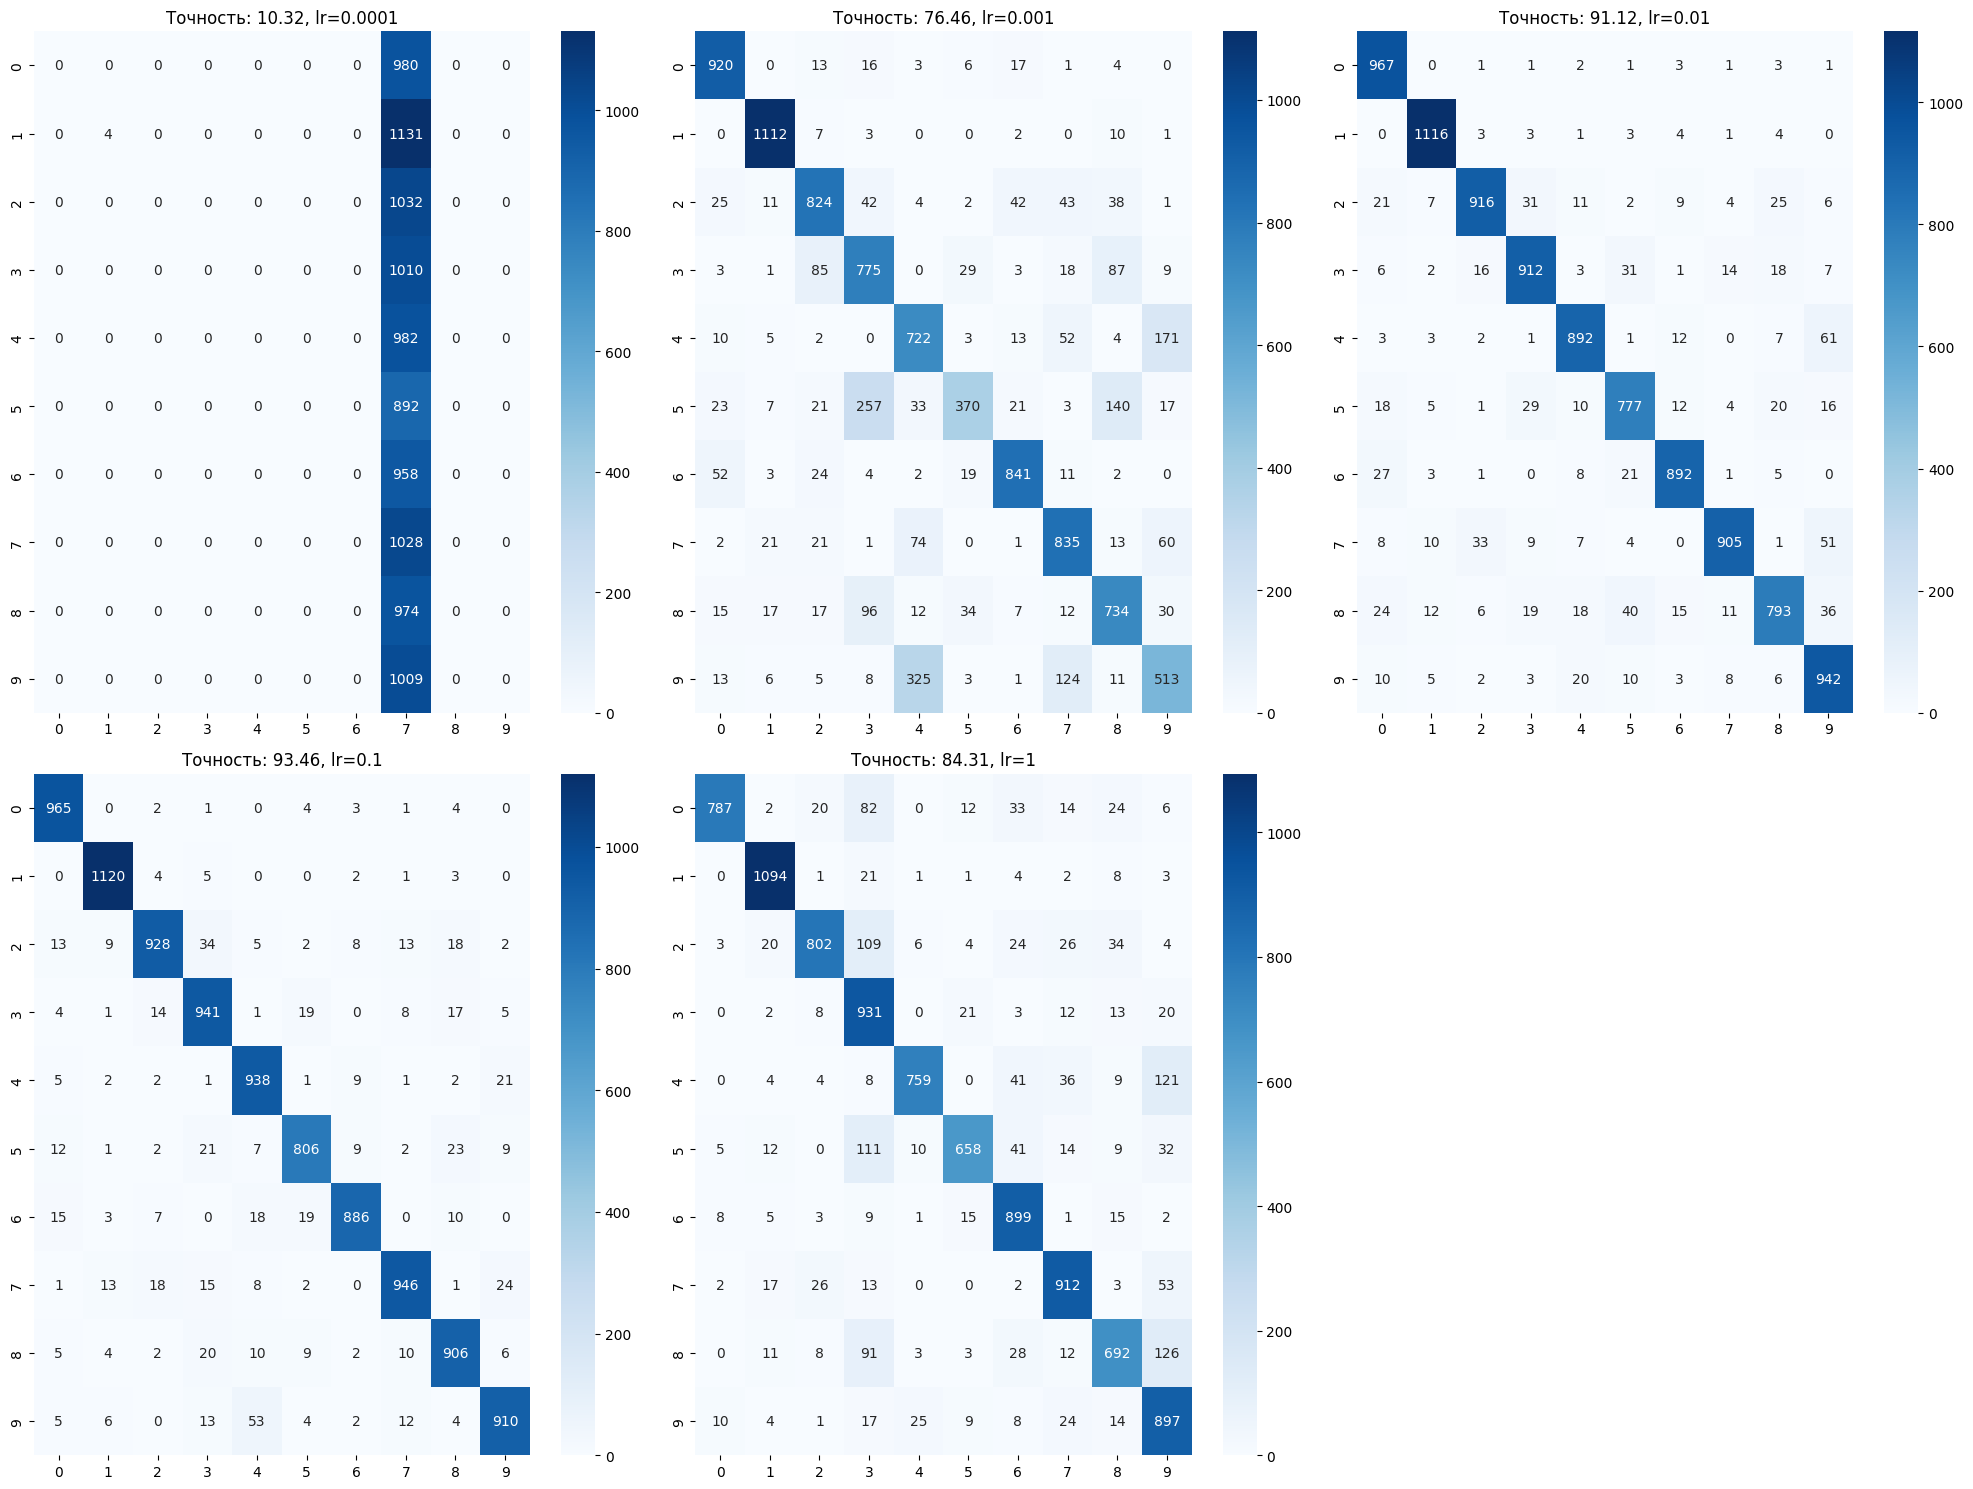

In [16]:
plt.figure(figsize=(20, 15))

for i, (accuracy, matrix, lr) in enumerate(acc_1, 1):
    plt.subplot(2, 3, i)  # 2 строки, 3 столбца, текущий индекс i
    sns.heatmap(matrix, annot=True, fmt='g', cmap='Blues')  # annot=True показывает значения в ячейках
    plt.title(f'Точность: {accuracy}, lr={lr}')  # Устанавливаем заголовок для каждого heatmap

plt.tight_layout()  # Автоматически корректирует подграфики, чтобы они не перекрывали друг друга
plt.show()  # Отображаем графики

In [18]:
acc_2 = []
for iterations_number in [1, 3, 5, 7, 10]:
    accuracy, matrix = algo(learning_rate=0.01, iterations_number=iterations_number)
    print()
    acc_2.append((accuracy, matrix, iterations_number))

Эпоха: 1, Entropy: 0.02567427180995278

Эпоха: 1, Entropy: 0.02567427180995278
Эпоха: 2, Entropy: 0.021239757559888797
Эпоха: 3, Entropy: 0.01534594243686924

Эпоха: 1, Entropy: 0.02567427180995278
Эпоха: 2, Entropy: 0.021239757559888797
Эпоха: 3, Entropy: 0.01534594243686924
Эпоха: 4, Entropy: 0.008295338566150568
Эпоха: 5, Entropy: 0.004269687427659372

Эпоха: 1, Entropy: 0.02567427180995278
Эпоха: 2, Entropy: 0.021239757559888797
Эпоха: 3, Entropy: 0.01534594243686924
Эпоха: 4, Entropy: 0.008295338566150568
Эпоха: 5, Entropy: 0.004269687427659372
Эпоха: 6, Entropy: 0.0022533172070615505
Эпоха: 7, Entropy: 0.0013672985744783482

Эпоха: 1, Entropy: 0.02567427180995278
Эпоха: 2, Entropy: 0.021239757559888797
Эпоха: 3, Entropy: 0.01534594243686924
Эпоха: 4, Entropy: 0.008295338566150568
Эпоха: 5, Entropy: 0.004269687427659372
Эпоха: 6, Entropy: 0.0022533172070615505
Эпоха: 7, Entropy: 0.0013672985744783482
Эпоха: 8, Entropy: 0.0007678807028030719
Эпоха: 9, Entropy: 0.0005024335233530964

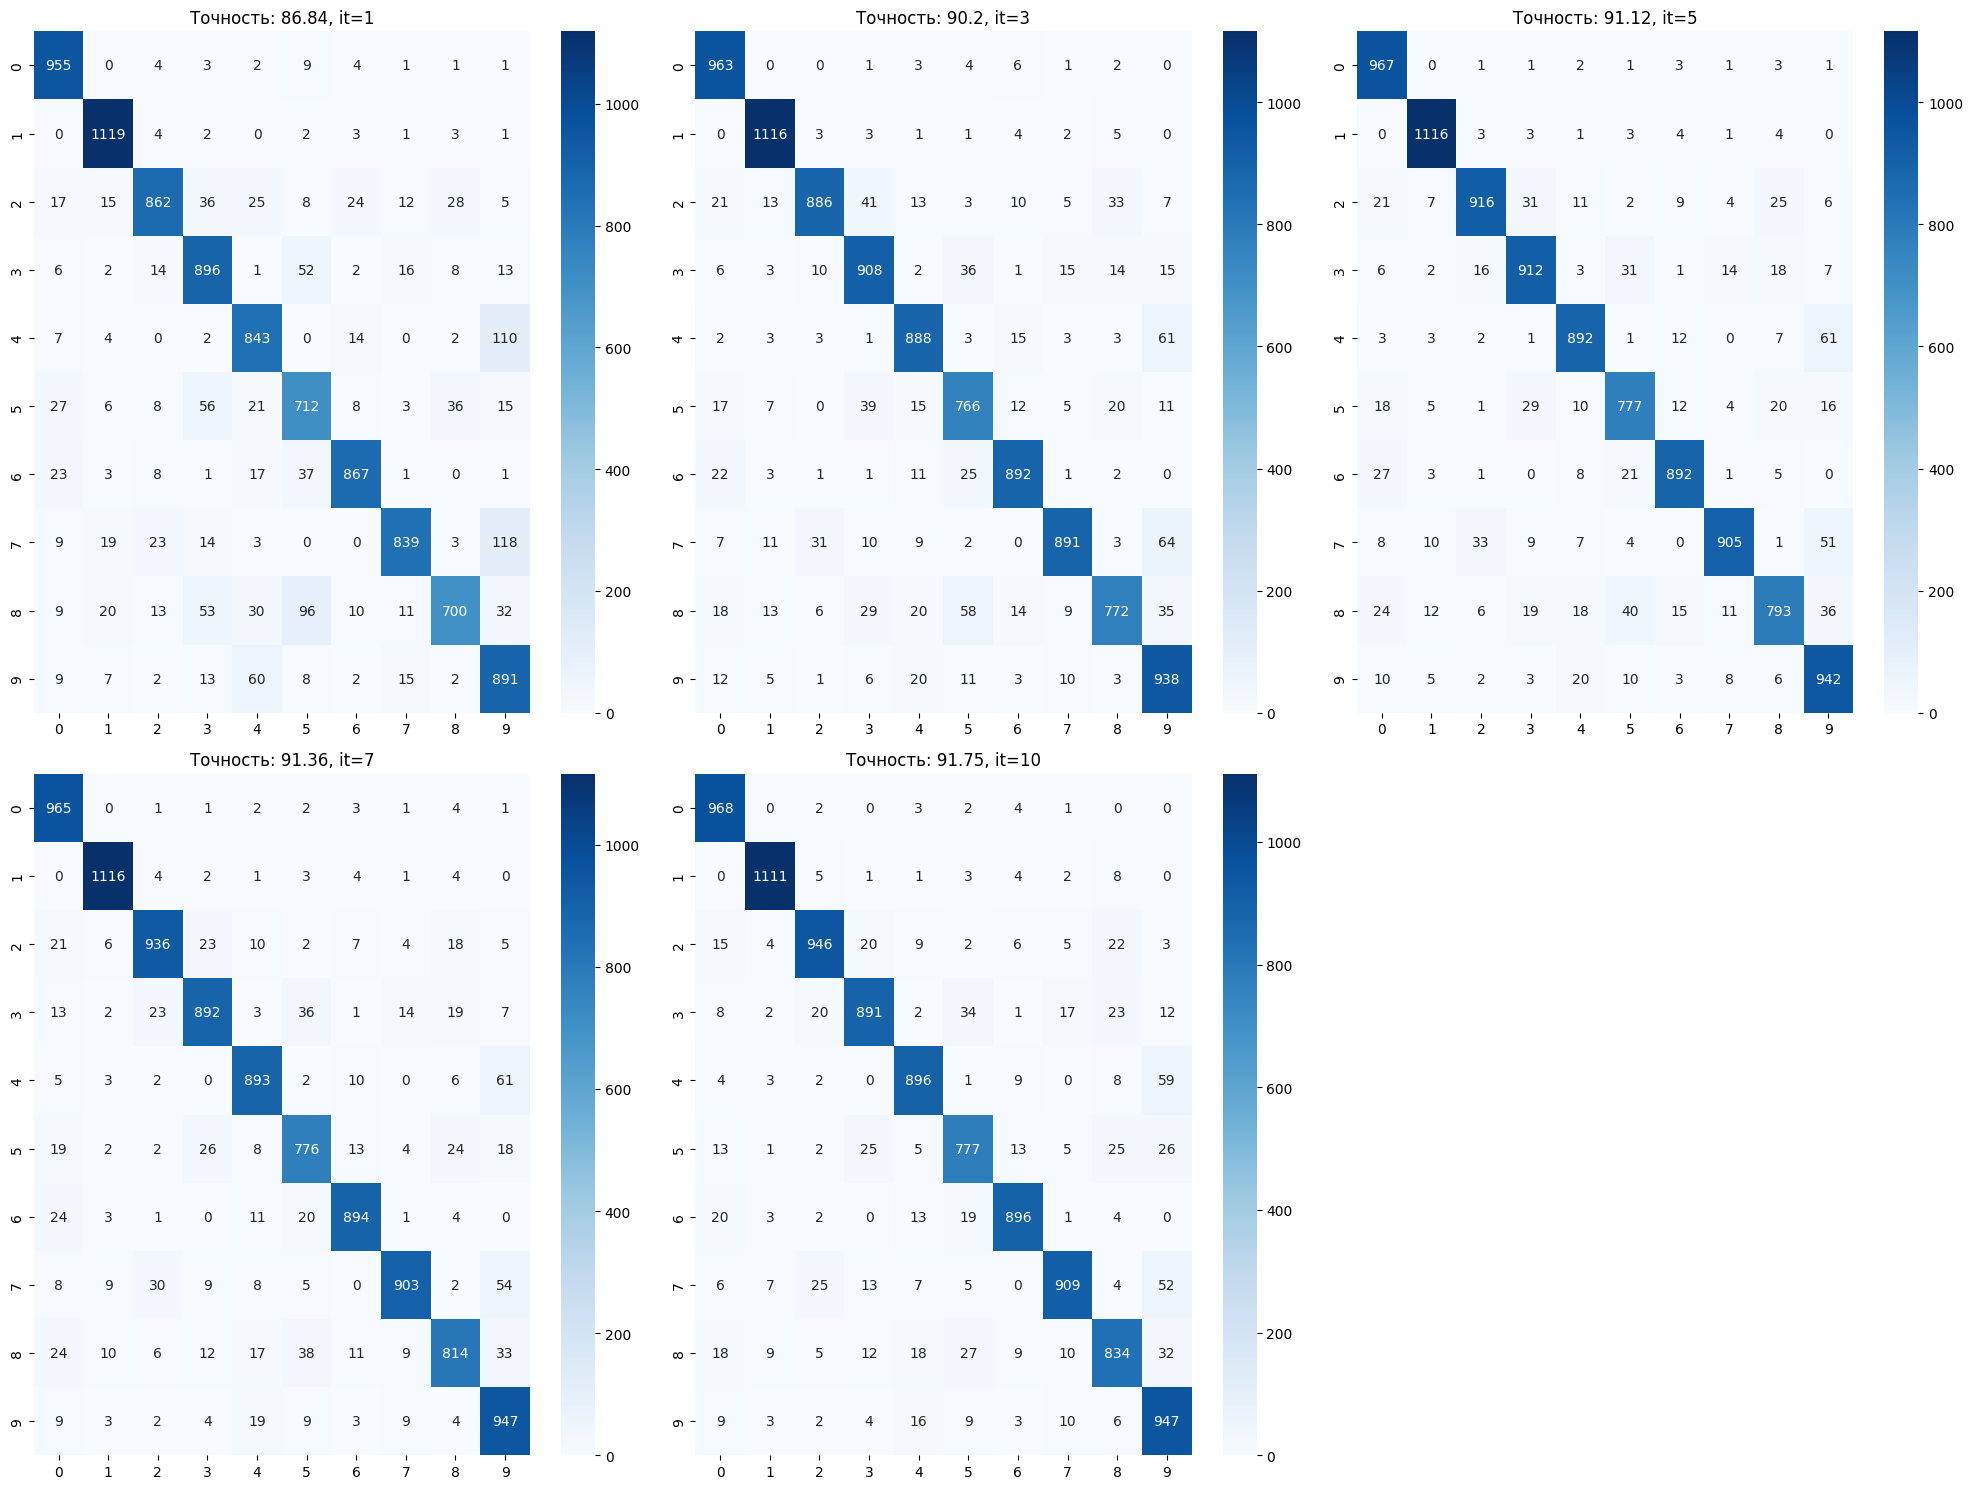

In [20]:
plt.figure(figsize=(20, 15))

for i, (accuracy, matrix, it) in enumerate(acc_2, 1):
    plt.subplot(2, 3, i)  # 2 строки, 3 столбца, текущий индекс i
    sns.heatmap(matrix, annot=True, fmt='g', cmap='Blues')  # annot=True показывает значения в ячейках
    plt.title(f'Точность: {round(accuracy, 2)}, it={it}')  # Устанавливаем заголовок для каждого heatmap

plt.tight_layout()  # Автоматически корректирует подграфики, чтобы они не перекрывали друг друга
plt.show()  # Отображаем графики

In [5]:
acc_3 = []
for hidden in [10, 20, 30, 50, 100]:
    accuracy, matrix = algo(learning_rate=0.01, iterations_number=5, hidden_size=hidden)
    print()
    acc_3.append((accuracy, matrix, hidden))

Эпоха: 1, Entropy: 0.11824309071270608
Эпоха: 2, Entropy: 0.016724978812195913
Эпоха: 3, Entropy: 0.005069601998058703
Эпоха: 4, Entropy: 0.004014885927802028
Эпоха: 5, Entropy: 0.0037391340841507444

Эпоха: 1, Entropy: 0.02567427180995278
Эпоха: 2, Entropy: 0.021239757559888797
Эпоха: 3, Entropy: 0.01534594243686924
Эпоха: 4, Entropy: 0.008295338566150568
Эпоха: 5, Entropy: 0.004269687427659372

Эпоха: 1, Entropy: 0.02179258907843109
Эпоха: 2, Entropy: 0.012543791189711476
Эпоха: 3, Entropy: 0.007990842293526894
Эпоха: 4, Entropy: 0.0040979769571326645
Эпоха: 5, Entropy: 0.0023816855679513077

Эпоха: 1, Entropy: 0.00828318111838201
Эпоха: 2, Entropy: 0.0026816086334486215
Эпоха: 3, Entropy: 0.0027483223811283443
Эпоха: 4, Entropy: 0.002586356389945606
Эпоха: 5, Entropy: 0.002615901895714988

Эпоха: 1, Entropy: 0.007381124324223706
Эпоха: 2, Entropy: 0.00403510446465963
Эпоха: 3, Entropy: 0.003068955307915966
Эпоха: 4, Entropy: 0.001969057689960942
Эпоха: 5, Entropy: 0.0010311780959144

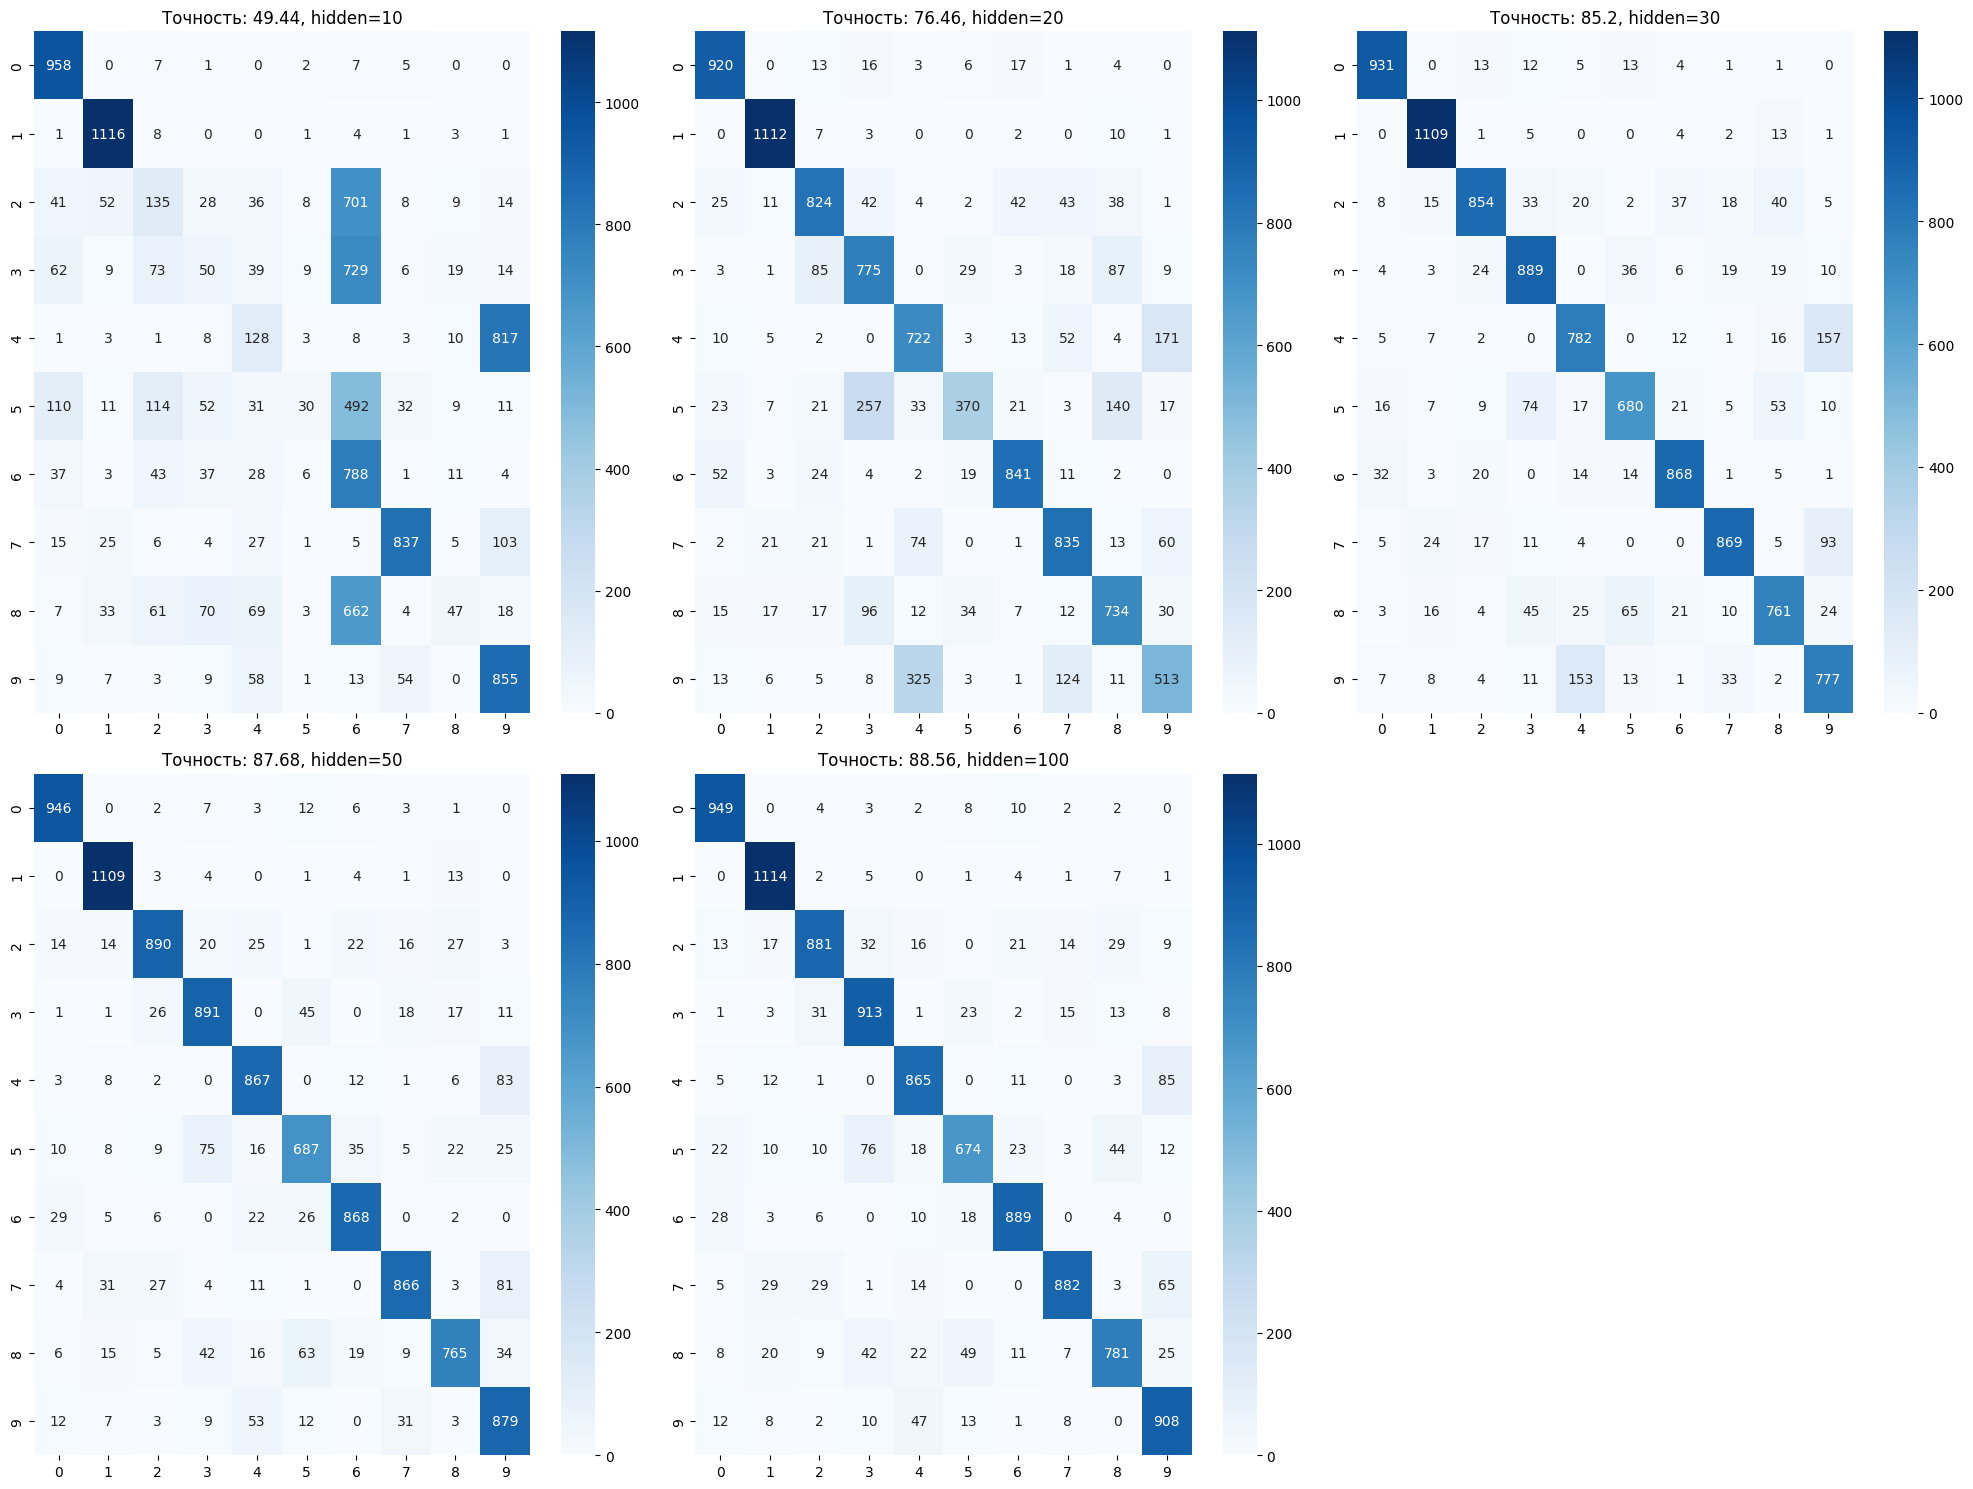

In [4]:
plt.figure(figsize=(20, 15))

for i, (accuracy, matrix, it) in enumerate(acc_3, 1):
    plt.subplot(2, 3, i)  # 2 строки, 3 столбца, текущий индекс i
    sns.heatmap(matrix, annot=True, fmt='g', cmap='Blues')  # annot=True показывает значения в ячейках
    plt.title(f'Точность: {round(accuracy, 2)}, hidden={it}')  # Устанавливаем заголовок для каждого heatmap

plt.tight_layout()  # Автоматически корректирует подграфики, чтобы они не перекрывали друг друга
plt.show()  # Отображаем графики